<a href="https://colab.research.google.com/github/kwyvanessa/Datathon_2022/blob/Train-Test-Split/WID_Datathon_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datathon 2022

## Problem Statement

Preliminary Problem Statement:  What are the three most influential indicators of the gender pay gap 

# Datasets

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from google.colab import drive

## UN Human Development Reports data

[Data Dictionary](https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_metadata.xlsx) <br>

This dataset from the [UNHDR](https://hdr.undp.org/data-center) includes time series data for several UN HDC indices and supporting measurements in a single tabular file. The full original dataset can be downloaded from UNHDR [here](https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_complete_time_series.csv).   <br>

The original datset includes annual data in columnar format.  We used Tableau Prep to quickly transform the annual data into a row format, with one row for each Country/Year combination, and a single column for each variable.

Glossary of column prefixes <br>
country: Country that data relates to <br>
year: Year of measurment <br>
region: Developing region: (AS: Arab States (20); EAP: East Asia and Pacific (26); ECA: Europe and Central Asia (17); LAC: Latin America and Caribbean (33); SA: South Asia (9); SSA: Sub Saharan Africa) <br>
hdi: Human Development Index<br>
gdi:  Gender Development Index<br>
gii: Gender inequality index<br>
phdi: planetary pressures adjusted HDI<br>
ihdi: Inequality-adjusted HDI<br>
le: life expectancy<br>
gnipc: Gross National Income per capita<br>
mys: Mean years of schooling<br>
eys: Expected Years of Schooling<br>


mmr: Material mortality rate<br>
abr: Adolescent birth rate <br>
se: population with atleast some secondary ed<br>
pr: share of seats in parliament<br>
lfpr: labor force participation rate<br>

co2_prod: Co2 emissions per capita<br>
coef_inc: Coefficient of inequality<br>
ineq_le: Inequality in life expectancy<br>
ineq_inc: Inequality in income


In [ ]:
# Use curl to retrieve transformed csv file from github repo and save in Colab working director
!curl -O "https://raw.githubusercontent.com/kwyvanessa/Datathon_2022/main/hdrDF_by_year_data.csv"

# Read in the csv from the Colab working directory - using a subset of the columns, and parse_dates are enabled to format of the datetime strings. I
hdrDF_y = pd.read_csv("/content/hdrDF_by_year_data.csv",\
                      usecols = ['country','region', 'hdicode','hdi_rank_2021','Year','hdi','le','mys','gnipc','gdi','ihdi','coef ineq','ineq le', 'ineq inc', 'gii','mmr','abr','pr f','lfpr f', 'lfpr m', 'se f', 'se m'],\
                      infer_datetime_format= True)
# Rename columns for consistency of style
hdrDF_y.rename({'coef ineq':'coef_ineq','se m':'se_m','se f':'se_f','pr f':'pr_f','ineq le':'ineq_le','ineq inc':'ineq_inc', 'Year':'date'}, axis =1, inplace = True)

hdrDF_y['date'] = pd.to_datetime(hdrDF_y['date'], format = '%m/%d/%Y') # convert the date column to datetime format
hdrDF_y['year'] = hdrDF_y['date'].dt.year # create a new column for the Year of the observation
hdrDF_y.sample(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2023k  100 2023k    0     0  6264k      0 --:--:-- --:--:-- --:--:-- 6245k


,hdicode,region,hdi_rank_2021,date,country,hdi,coef_ineq,se_m,se_f,pr_f,...,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year
2975,Low,SSA,189.0,2001-01-01,Niger,0.268,NaN,10.474881,2.627247,1.204819,...,69.232,49.8407,NaN,NaN,NaN,1011.085577,0.790,0.729,204.199,2001
6134,High,ECA,85.0,2001-01-01,Armenia,0.666,NaN,92.391983,89.970261,3.053435,...,45.162,70.9320,NaN,NaN,NaN,4602.441726,0.444,0.935,32.841,2001
4487,Medium,LAC,120.0,2001-01-01,Venezuela (Bolivarian Republic of),0.689,NaN,37.835458,40.124124,9.696970,...,48.530,71.2015,NaN,NaN,NaN,16343.749000,0.527,0.982,93.875,2001
5158,Medium,EAP,136.0,2014-01-01,Kiribati,0.610,NaN,NaN,NaN,8.695652,...,NaN,65.8147,25.975925,NaN,NaN,3705.649317,NaN,NaN,43.368,2014
4900,Very High,NaN,45.0,2021-01-01,Slovakia,0.848,5.168765,99.181351,98.864120,22.666667,...,54.743,74.9101,4.692835,9.06554,0.803,30690.485520,0.180,0.999,26.307,2021
2686,High,SA,73.0,2000-01-01,Sri Lanka,0.688,NaN,76.566873,72.719995,4.888889,...,36.286,70.3550,NaN,NaN,NaN,5850.024609,0.462,0.947,29.890,2000
559,High,SA,76.0,2009-01-01,Iran (Islamic Republic of),0.738,NaN,63.810871,58.345396,2.758621,...,15.774,72.6979,NaN,NaN,NaN,13199.897100,0.530,0.868,34.439,2009
6320,Medium,LAC,135.0,2006-01-01,Guatemala,0.581,NaN,17.384420,12.602650,8.227848,...,41.865,69.8124,NaN,NaN,NaN,6819.812353,0.574,0.902,90.832,2006
2280,Medium,EAP,140.0,2001-01-01,Lao People's Democratic Republic,0.476,NaN,28.652000,14.838000,21.212121,...,78.875,59.0698,NaN,NaN,NaN,2831.486058,0.581,0.855,98.236,2001
1278,Medium,SSA,158.0,2010-01-01,Mauritania,0.510,32.541316,17.806058,8.823193,19.205298,...,28.235,63.1049,31.783787,23.78016,0.342,4610.543008,0.657,0.857,91.664,2010


## UN Women Data Hub Wage Data

Data on Average Hourly Wage by gender, country and year was sourced from the [UN Women SDG Indicators Dashboard](https://data.unwomen.org/data-portal).<br>
The Average Hourly Wage data is averaged for all occupations.<br>
This dataset will be used to calculate a 'Wage Ratio' to estimate the target variable of the gender pay gap.  The Wage Ratio is calculated below as the Average Hourly Wage (Female) divided by the Average Hourly Wage (Male). 

In [ ]:
# Use curl to get csv file from github repo and save in Colab working directory
!curl -O "https://raw.githubusercontent.com/kwyvanessa/Datathon_2022/main/UNWDH_wages_all.csv"
# Read in the csv from the working directory  - using a subset of the columns.
wages = pd.read_csv("/content/UNWDH_wages_all.csv", usecols = ['REF_AREA Description','TIME_PERIOD','OBS_VALUE','Sex'])
#rename columns
wages.rename({'REF_AREA Description': 'Country', 'TIME_PERIOD': 'Year', 'OBS_VALUE': 'avgHrlyWage'},axis=1, inplace = True) 
#Filter the data
wages = wages.loc[wages['Sex'].isin(['Female','Male'])]
wages.sample(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  629k  100  629k    0     0  2498k      0 --:--:-- --:--:-- --:--:-- 2498k


,Country,Year,avgHrlyWage,Sex
1088,El Salvador,2001,11.1,Female
1077,Ecuador,2017,2.8,Male
989,Dominican Republic,2005,52.8,Female
777,Armenia,2018,671.1,Male
1272,Honduras,2010,41.9,Female
298,Portugal,2013,4.5,Female
987,Denmark,2018,203.0,Female
200,Paraguay,2009,7246.8,Male
210,Paraguay,2012,9583.0,Female
96,Republic of Korea,2011,17962.0,Male


In [ ]:
#Pivot the data
wages_wide_mi = wages.pivot(index = ['Country', 'Year'], columns = 'Sex', values = ['avgHrlyWage'])
#drop the multilevel column index
wages_wide_mi.columns = wages_wide_mi.columns.droplevel(0)
#remove the multilevel index
wages_wide = wages_wide_mi.reset_index()
wages_wide.sample(10)

Sex,Country,Year,Female,Male
394,Serbia,2014,183.3,192.1
440,United Kingdom of Great Britain and Northern I...,2015,13.2,16.6
28,Belgium,2010,17.8,19.8
96,Chile,2013,3085.0,3883.0
405,Slovenia,2014,8.5,9.1
219,Honduras,2002,19.8,19.2
457,Uruguay,2012,108.1,112.1
19,Armenia,2016,515.1,641.7
425,Sweden,2017,184.3,207.6
107,Costa Rica,2005,1084.0,1147.0


In [ ]:
# Add a new calculated field for the ratio of Female wages in a given year and country as a percentage of Male wages
wages_wide['wage_ratio'] = wages_wide['Female'] / wages_wide['Male']
wages_wide.sample(10)

Sex,Country,Year,Female,Male,wage_ratio
286,Mauritius,2011,72.0,93.0,0.774194
112,Costa Rica,2013,2736.3,2543.7,1.075716
81,Brazil,2019,13.3,15.1,0.880795
10,Argentina,2009,13.0,13.2,0.984848
218,Honduras,2001,19.7,20.7,0.951691
283,Malta,2010,8.1,8.7,0.931034
204,Guatemala,2002,10.2,9.4,1.085106
201,Greece,2014,8.8,10.1,0.871287
97,Chile,2015,2713.0,3238.4,0.837759
466,Venezuela (Bolivarian Republic of),2001,1552.0,1590.0,0.976101


In [ ]:
# Drop unneeded columns, rename columns
wages_wide.drop(['Female','Male'], axis =1, inplace = True, errors = 'ignore')
wages_wide.rename({'Country':'country','Year':'year'}, axis = 1, inplace = True)
wages_wide.sample(10)

Sex,country,year,wage_ratio
284,Malta,2014,0.894231
114,Costa Rica,2015,1.079250
1,Argentina,2000,1.000000
66,Brazil,2003,0.833333
87,Cabo Verde,2015,0.992647
47,Bolivia (Plurinational State of),2014,0.910714
240,Iceland,2016,0.808864
19,Armenia,2016,0.802712
258,Jordan,2018,1.111111
217,Haiti,2001,0.839623


## Merge Dataframes
Combine the UNHDR data with the UN Wage Data to produce a single dataframe for analysis

In [ ]:
# Compare country column from each dataframe
print(wages_wide['country'].nunique())
wages_wide['country'].unique()

102


array(['Albania', 'Argentina', 'Armenia', 'Austria', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Chad', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia',
       'Eswatini', 'Finland', 'France', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Jordan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Myanmar', 'Nepal', 'Netherlands', 'Nicaragua',
       'North Macedonia', 'Norway'

In [ ]:
print(hdrDF_y['country'].nunique())
hdrDF_y['country'].sort_values().unique()

206


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Arab States', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Congo (Democratic Republic of the)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia and the Pacific', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom of)', 'Ethiopia', 'Europe and Central Asia',
       'Fiji', 'Finland

In [ ]:
# Rename country values to make consistent between the two datasets
wages_wide.loc[wages_wide['country'] == 'Republic of Korea'] = 'Korea (Republic of)' # Korea
wages_wide.loc[wages_wide['country'] == 'United Kingdom of Great Britain and Northern Ireland'] = 'United Kingdom' # United Kingdom
hdrDF_y.loc[hdrDF_y['country'] == 'Eswatini (Kingdom of)'] = 'Eswatini' #Eswatini

In [ ]:
# Merge datasets
paygap = pd.merge(hdrDF_y, wages_wide, how = 'inner', on = ['country','year'])
paygap.sample(10)

,hdicode,region,hdi_rank_2021,date,country,hdi,coef_ineq,se_m,se_f,pr_f,...,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
387,Very High,NaN,7.0,2017-01-01 00:00:00,Sweden,0.941,6.553768,91.329353,90.810188,43.553009,...,82.4382,2.858345,13.01092,0.878,52849.39299,0.035,0.984,4.316,2017,0.887765
448,High,LAC,84.0,2010-01-01 00:00:00,Peru,0.725,20.257412,65.228783,53.219379,27.5,...,73.7106,12.031512,31.250345,0.575,9317.266284,0.423,0.943,64.919,2010,0.761905
156,Very High,ECA,63.0,2017-01-01 00:00:00,Serbia,0.802,13.52749,93.617607,86.307648,34.4,...,76.213,4.364899,28.08094,0.688,15538.46624,0.138,0.976,14.763,2017,0.908062
173,Very High,NaN,32.0,2014-01-01 00:00:00,Czechia,0.887,5.191156,99.816116,99.81488,18.505338,...,78.755,3.221919,10.73835,0.841,32119.85559,0.146,0.985,12.123,2014,0.792519
351,High,LAC,84.0,2005-01-01 00:00:00,Peru,0.686,NaN,54.74044,45.906528,18.333333,...,72.9858,NaN,NaN,NaN,7094.575199,0.462,0.936,68.491,2005,0.846154
233,Medium,LAC,125.0,2002-01-01 00:00:00,El Salvador,0.626,NaN,32.745447,22.225982,9.52381,...,70.2324,NaN,NaN,NaN,6478.709785,0.515,0.925,92.917,2002,0.807143
118,High,LAC,80.0,2017-01-01 00:00:00,Dominican Republic,0.757,20.047882,69.786662,70.876798,24.324324,...,73.0629,18.344303,26.093622,0.604,15941.67145,0.454,1.006,87.909,2017,1.058405
453,Medium,LAC,120.0,2005-01-01 00:00:00,Venezuela (Bolivarian Republic of),0.721,NaN,42.805162,46.216634,17.365269,...,72.7825,NaN,NaN,NaN,16817.616,0.489,0.99,94.324,2005,0.949033
407,Very High,LAC,47.0,2002-01-01 00:00:00,Argentina,0.785,NaN,51.111229,51.146694,31.306991,...,74.408,NaN,NaN,NaN,14727.85071,0.39,0.989,63.078,2002,0.878049
428,Low,SSA,173.0,2015-01-01 00:00:00,Madagascar,0.504,27.439097,30.422803,26.860513,20.529801,...,64.339,26.864531,20.43828,0.364,1494.630382,0.559,0.955,130.238,2015,0.926953


In [ ]:
# Create a Datetime Index from the date field
paygap.set_index('date', drop = True, inplace = True) 
paygap.sample(10)

,hdicode,region,hdi_rank_2021,country,hdi,coef_ineq,se_m,se_f,pr_f,mys,...,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,Very High,NaN,22.0,Israel,0.913,11.185586,91.345462,88.788586,26.666667,13.055352,...,82.4854,3.311211,23.689,0.806,37937.41307,0.101,0.974,9.505,2016,0.806452
2004-01-01,High,LAC,84.0,Peru,0.69,NaN,65.712433,57.774158,18.333333,8.59755,...,72.668,NaN,NaN,NaN,6813.762314,0.463,0.94,68.165,2004,0.775
2013-01-01,Low,SSA,169.0,Malawi,0.478,28.478869,24.940373,15.481261,22.279793,4.065824,...,59.7288,27.554527,27.68067,0.342,1386.630627,0.58,0.91,135.996,2013,0.809808
2005-01-01,Very High,LAC,47.0,Argentina,0.802,NaN,61.10754,60.709327,37.386018,10.098967,...,75.1388,NaN,NaN,NaN,17271.06449,0.373,0.99,64.877,2005,1.017241
2007-01-01,High,LAC,105.0,Paraguay,0.669,NaN,39.036129,35.01265,11.2,7.15333,...,71.1061,NaN,NaN,NaN,8677.024029,0.509,0.949,74.661,2007,0.966425
2018-01-01,Very High,NaN,22.0,Israel,0.919,10.913674,92.912511,90.622523,27.5,13.247655,...,82.8232,3.335021,23.134,0.815,39620.10088,0.089,0.98,8.086,2018,0.840121
2016-01-01,Very High,LAC,58.0,Costa Rica,0.803,17.501555,52.459351,53.68642,33.333333,8.56439,...,79.4592,6.100358,34.221197,0.655,18902.33613,0.312,0.983,53.031,2016,1.097878
2010-01-01,High,LAC,86.0,Mexico,0.746,20.672391,55.108299,51.257259,24.840764,8.00507,...,74.1901,12.166163,32.397166,0.589,17575.83104,0.408,0.953,75.329,2010,0.968652
2015-01-01,Very High,NaN,13.0,Belgium,0.924,7.95174,86.673378,82.187019,42.380952,11.89404,...,80.8898,3.594241,12.25388,0.85,50027.9913,0.063,0.972,6.862,2015,0.889447


# Exploratory Data Analysis

## Shapes, Sizes, and Info

In [ ]:
# rows and columns of dataframe
paygap_sh = paygap.shape    # number of instances (rows) and features (cols)
paygap_sz = paygap.size     # the number of elements
paygap_col = paygap.columns # to know just the names of the columns or features

print(f"paygap dataframe: \n\n\
 shape (rows|cols): {paygap_sh}\n \
size: {paygap_sz}\n\n \
Features|Columns\n{paygap_col}")

paygap dataframe: 

 shape (rows|cols): (466, 23)
 size: 10718

 Features|Columns
Index(['hdicode', 'region', 'hdi_rank_2021', 'country', 'hdi', 'coef_ineq',
       'se_m', 'se_f', 'pr_f', 'mys', 'mmr', 'lfpr m', 'lfpr f', 'le',
       'ineq_le', 'ineq_inc', 'ihdi', 'gnipc', 'gii', 'gdi', 'abr', 'year',
       'wage_ratio'],
      dtype='object')


In [ ]:
# Displays the concise summary of dataframe
paygap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 466 entries, 2018-01-01 to 2017-01-01
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hdicode        466 non-null    object
 1   region         354 non-null    object
 2   hdi_rank_2021  466 non-null    object
 3   country        466 non-null    object
 4   hdi            466 non-null    object
 5   coef_ineq      303 non-null    object
 6   se_m           466 non-null    object
 7   se_f           466 non-null    object
 8   pr_f           465 non-null    object
 9   mys            466 non-null    object
 10  mmr            466 non-null    object
 11  lfpr m         466 non-null    object
 12  lfpr f         466 non-null    object
 13  le             466 non-null    object
 14  ineq_le        336 non-null    object
 15  ineq_inc       312 non-null    object
 16  ihdi           303 non-null    object
 17  gnipc          466 non-null    object
 18  gii        

## Total count of null values for all the attributes

In [ ]:
print("Columns with missing values: ")
print(paygap.columns[paygap.isnull().any()].tolist())

Columns with missing values: 
['region', 'coef_ineq', 'pr_f', 'ineq_le', 'ineq_inc', 'ihdi', 'gii', 'gdi']


In [ ]:
# to know just the missing values
print(paygap.isnull().sum())

hdicode            0
region           112
hdi_rank_2021      0
country            0
hdi                0
coef_ineq        163
se_m               0
se_f               0
pr_f               1
mys                0
mmr                0
lfpr m             0
lfpr f             0
le                 0
ineq_le          130
ineq_inc         154
ihdi             163
gnipc              0
gii                1
gdi               11
abr                0
year               0
wage_ratio         0
dtype: int64


In [ ]:
print(paygap.columns[paygap.notnull().any()].tolist())

['hdicode', 'region', 'hdi_rank_2021', 'country', 'hdi', 'coef_ineq', 'se_m', 'se_f', 'pr_f', 'mys', 'mmr', 'lfpr m', 'lfpr f', 'le', 'ineq_le', 'ineq_inc', 'ihdi', 'gnipc', 'gii', 'gdi', 'abr', 'year', 'wage_ratio']


In [ ]:
# to know just the non null values
total_nn = paygap.count() - paygap.isnull().sum()
print(total_nn)

hdicode          466
region           242
hdi_rank_2021    466
country          466
hdi              466
coef_ineq        140
se_m             466
se_f             466
pr_f             464
mys              466
mmr              466
lfpr m           466
lfpr f           466
le               466
ineq_le          206
ineq_inc         158
ihdi             140
gnipc            466
gii              464
gdi              444
abr              466
year             466
wage_ratio       466
dtype: int64


##Summary statistics of the categorical features

In [ ]:
paygap.describe(include='object')

,hdicode,region,hdi_rank_2021,country,hdi,coef_ineq,se_m,se_f,pr_f,mys,...,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
count,466,354,466.0,466,466.000,303.000000,466.0,466.0,465.000000,466.00000,...,466.0000,336.000000,312.000000,303.000,466.00000,465.000,455.000,466.000,466,466.0
unique,4,6,93.0,98,281.000,303.000000,463.0,464.0,248.000000,466.00000,...,466.0000,336.000000,266.000000,230.000,466.00000,298.000,133.000,466.000,20,411.0
top,Very High,LAC,58.0,Uruguay,0.732,23.057323,100.0,100.0,19.298246,10.55221,...,75.6444,6.079516,18.180982,0.619,26720.61992,0.424,0.989,9.536,2014,1.0
freq,205,248,35.0,20,6.000,1.000000,4.0,3.0,11.000000,1.00000,...,1.0000,1.000000,8.000000,4.000,1.00000,6.000,17.000,1.000,58,18.0


In [ ]:
# For the dataframe group numeric features by each categorical feature 
# Displays categorical features noted above that have unique (2nd row) features < 100
for column in paygap.select_dtypes(include='object'):
    if paygap[column].nunique() < 100:
        display(paygap.groupby(column).mean())
     

,hdi_rank_2021,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
hdicode,,,,,,,,,,,,,,,,,,,,
High,90.918919,0.723912,17.908825,59.984475,56.497046,18.685543,8.360739,72.229730,75.310020,50.200764,73.681330,10.933429,27.460042,0.605843,11276.968493,0.405973,0.966165,60.760541,2011.560811,0.914677
Low,169.062500,0.492437,30.039715,30.316660,16.851426,20.451785,4.090415,415.187500,74.203063,54.981250,61.117956,30.130393,22.867904,0.345429,2409.031816,0.578688,0.838800,95.184875,2014.375000,0.767170
Medium,129.721649,0.632670,25.099693,40.062714,34.684014,19.958914,6.319224,135.134021,80.085351,49.853433,69.393308,17.239348,31.831803,0.477260,6871.894417,0.487639,0.946948,82.290763,2010.329897,0.993945
Very High,39.243902,0.846815,10.638534,75.289067,73.392351,25.579047,10.647016,20.502439,69.843785,51.364849,78.537182,5.006987,19.076226,0.773527,31203.317357,0.212544,0.984390,29.170868,2012.848780,0.897731


,hdi_rank_2021,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
region,,,,,,,,,,,,,,,,,,,,
AS,104.500000,0.728250,14.450390,76.789690,71.656644,12.710337,9.931514,41.750000,64.106250,16.954500,76.639000,8.905803,17.911850,0.617667,11092.861615,0.443500,0.892750,25.682250,2018.250000,1.162408
EAP,102.969697,0.707364,19.610009,64.753719,58.625768,18.583996,8.409085,86.000000,76.074848,57.641000,72.244491,13.145941,20.482429,0.539687,14280.462148,0.353344,0.974182,30.520121,2015.121212,0.958289
ECA,71.678571,0.777536,11.853381,88.773263,78.366272,22.545206,10.232040,14.392857,61.117107,41.374429,76.081204,5.616375,19.283906,0.685148,14127.679880,0.195857,0.960214,16.359143,2015.642857,0.888236
LAC,93.104839,0.710274,20.509616,48.079033,46.190863,20.417169,7.627976,84.495968,78.409073,49.983004,73.139718,12.130061,32.259984,0.580385,11923.823217,0.440500,0.967443,76.664077,2009.310484,0.955782
SA,106.916667,0.681667,21.973183,60.791842,54.957743,12.467981,7.999033,87.750000,76.063500,36.104500,72.460725,13.997224,18.995821,0.513889,8986.628260,0.440417,0.902167,33.406750,2016.166667,0.898631
SSA,128.206897,0.617552,25.928983,49.218803,38.084056,20.201570,6.715095,292.448276,73.571517,57.316793,65.706717,22.176367,26.529356,0.459560,9365.311830,0.498310,0.913483,78.628931,2015.310345,0.798471


,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
hdi_rank_2021,,,,,,,,,,,,,,,,,,,
1.0,0.9555,6.360337,97.567307,96.561054,29.065041,13.719900,5.0,74.1820,62.3980,83.32320,3.491925,13.485430,0.8935,68395.457870,0.0370,0.9675,2.7320,2016.0,0.824399
2.0,0.9570,5.544108,99.320202,99.105824,40.532544,12.844827,2.5,66.6255,62.3375,82.42320,2.844720,11.320785,0.9025,68888.986260,0.0310,0.9935,3.8145,2016.0,0.862463
3.0,0.9488,5.126354,98.631404,98.480712,40.952381,13.255520,4.2,80.8332,72.3612,82.45992,2.594673,10.195156,0.8996,51723.690740,0.0590,0.9772,6.8272,2016.0,0.816199
6.0,0.9370,6.531351,92.658348,92.636177,38.268156,12.624150,4.0,65.8940,57.2890,80.81010,3.682917,12.174925,0.8750,55773.717885,0.0285,0.9780,3.1645,2016.0,0.846657
7.0,0.9388,6.617207,90.839625,90.226154,44.297994,12.419297,4.2,67.5434,60.7974,82.34332,2.858446,13.338526,0.8756,51903.112890,0.0374,0.9878,4.6102,2016.0,0.879688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173.0,0.5040,27.439097,30.422803,26.860513,20.529801,4.935426,363.0,89.2200,83.5990,64.33900,26.864531,20.438280,0.3640,1494.630382,0.5590,0.9550,130.2380,2015.0,0.926953
174.0,0.4670,NaN,35.852348,19.082861,7.547170,3.435686,650.0,68.1780,50.1170,62.09610,28.792980,26.928000,NaN,2092.378476,0.6530,0.8140,91.5970,2012.0,0.578431
184.0,0.4490,29.961907,15.741910,9.934090,11.023622,1.919520,320.0,73.4340,57.7820,60.04660,33.421192,17.311735,0.3120,2050.921164,0.5980,0.8840,115.1660,2018.0,0.761029


,hdi_rank_2021,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
country,,,,,,,,,,,,,,,,,,,,
Albania,67.0,0.806000,10.554499,92.903100,94.975638,27.857143,11.096983,15.000000,67.247000,51.189000,79.183800,6.151076,13.178980,0.720000,13302.705960,0.164000,0.997000,15.580000,2018.0000,0.930693
Argentina,47.0,0.817688,14.121856,59.890257,59.597865,34.821791,10.219403,54.750000,73.907813,48.814688,75.447894,8.933991,26.959373,0.719667,20253.786434,0.370375,0.993062,64.798000,2007.6875,0.985537
Armenia,85.0,0.768667,9.301325,97.320207,96.389146,15.289399,11.355898,26.500000,66.023000,46.685167,74.761117,8.341976,16.377033,0.695833,12364.387790,0.281333,0.987833,22.742667,2016.5000,0.803187
Austria,25.0,0.909333,6.555226,99.236799,95.457353,31.514442,11.979095,5.000000,66.870333,55.118667,81.180267,3.559078,13.418627,0.848333,53282.154527,0.085000,0.967333,8.078667,2014.0000,0.780201
Bangladesh,129.0,0.622000,23.575913,46.800072,38.460880,20.285714,6.270250,173.000000,80.135000,36.109000,71.787900,17.762270,15.656920,0.471000,4339.489843,0.534000,0.902000,78.290000,2017.0000,1.070085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,58.0,0.787750,12.868476,51.615386,54.639775,14.244186,8.541791,19.750000,73.400800,53.732250,76.670620,6.950790,24.657515,0.700200,17679.090164,0.330950,1.013550,61.744850,2009.5000,0.920348
Venezuela (Bolivarian Republic of),120.0,0.703571,NaN,40.320310,43.170379,12.217723,7.104344,121.428571,79.328286,48.054429,72.331329,NaN,NaN,NaN,15838.480000,0.515714,0.982571,93.448429,2003.0000,0.981224
Viet Nam,115.0,0.681800,17.552416,70.365725,60.435123,25.443762,7.990619,45.000000,81.200600,71.640500,73.837100,13.813202,21.558357,0.563778,6020.846143,0.312200,1.000100,35.153800,2014.4000,0.928866


,hdi_rank_2021,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,wage_ratio
year,,,,,,,,,,,,,,,,,,,
2000,84.909091,0.690364,NaN,45.023011,41.609390,12.511748,7.181865,103.363636,78.694000,45.896727,72.139527,NaN,NaN,NaN,11970.747864,0.487455,0.948000,84.117818,0.889713
2001,99.133333,0.659467,NaN,40.060684,37.918152,12.054868,6.716829,129.866667,78.844467,49.692400,70.211880,NaN,NaN,NaN,9224.994766,0.500600,0.959583,86.194067,0.923962
2002,100.000000,0.671769,NaN,40.945713,38.625812,13.083960,6.822095,108.384615,79.132154,49.305308,70.994654,NaN,NaN,NaN,9593.053910,0.492154,0.953077,83.716615,0.934669
2003,93.583333,0.683833,NaN,43.302869,41.552714,12.504801,7.111056,88.166667,79.124667,48.421333,72.267158,NaN,NaN,NaN,9763.859469,0.480167,0.957909,80.596750,0.923732
2004,94.916667,0.685250,NaN,41.426464,39.660778,14.851526,7.000834,86.083333,79.876583,49.656917,72.688375,NaN,NaN,NaN,9943.375856,0.473333,0.960909,80.958583,0.933620
2005,94.857143,0.686071,NaN,42.971671,40.802379,17.809440,7.124560,96.714286,79.518857,50.110429,72.087357,NaN,NaN,NaN,9865.123337,0.466214,0.963308,82.955000,0.946595
2006,94.846154,0.693385,NaN,44.039677,41.473874,17.793856,7.130136,95.384615,79.248308,49.904692,72.328254,NaN,NaN,NaN,10944.638159,0.461769,0.957667,79.845846,0.927371
2007,88.545455,0.706909,NaN,43.672600,41.268470,20.637718,7.310659,86.181818,78.362364,52.158000,72.745973,NaN,NaN,NaN,12403.294763,0.423273,0.967600,73.585364,0.903044
2008,86.000000,0.719615,NaN,46.352886,43.919961,22.183904,7.561929,76.615385,78.191769,51.194308,73.526985,NaN,NaN,NaN,13492.862730,0.412154,0.965750,72.895077,0.891022


## Visualizing the missing values

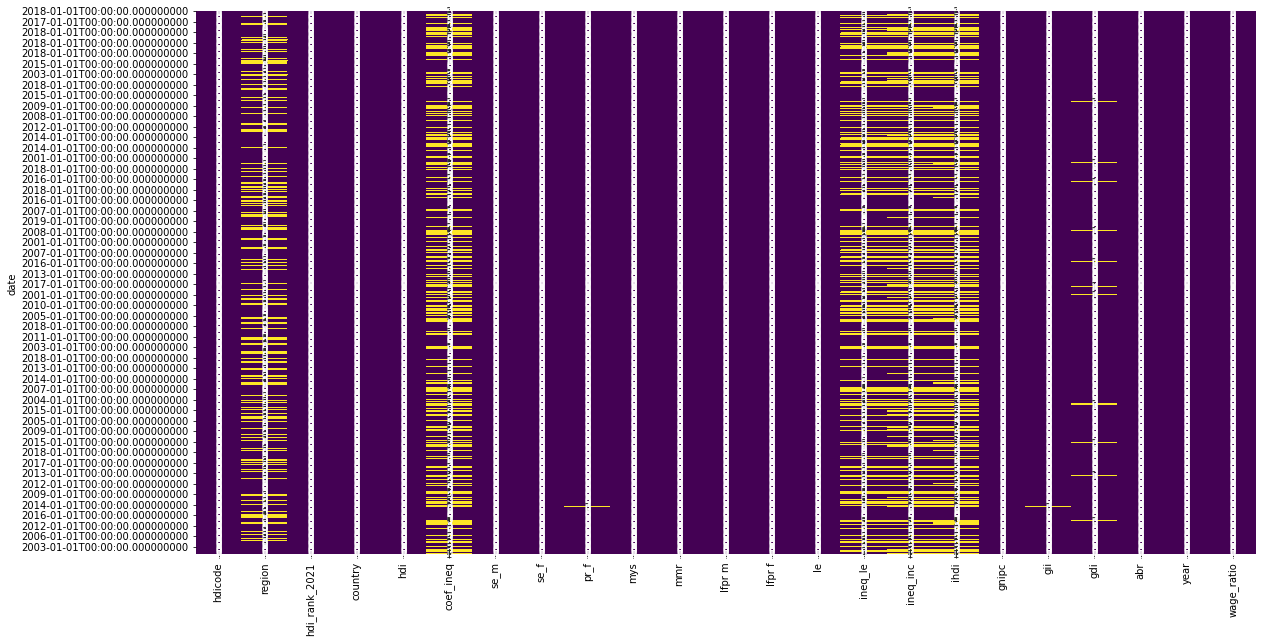

In [ ]:
plt.figure(figsize=(19, 10))

# setting the parameter values
sns.heatmap(paygap.isnull(),cbar=False,cmap='viridis', annot = True)

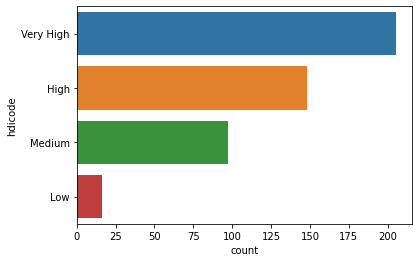

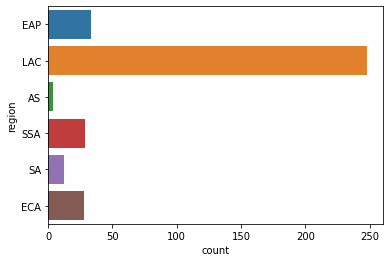

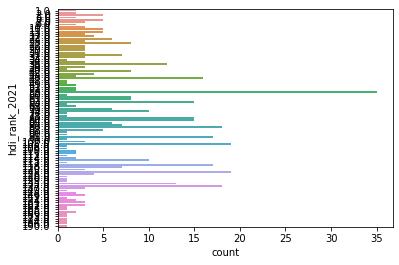

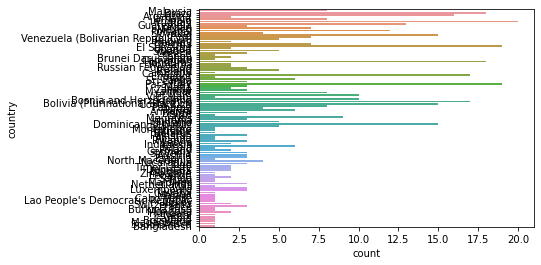

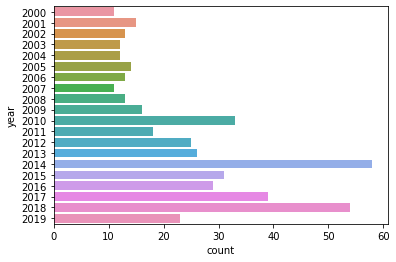

In [ ]:
# Plot of each categorical features < 100
for column in paygap.select_dtypes(include='object'):
    if paygap[column].nunique() < 100:
        sns.countplot(y=column, data=paygap)
        plt.show()

In [ ]:
# Fill in missing regions 
region_uniq = paygap["region"].sort_values().unique()
print(f"paygap region : {region_uniq}")

paygap["region"].fillna("No Region", inplace = True)
paygap["region"].sort_values().unique()

paygap region : ['AS' 'EAP' 'ECA' 'LAC' 'SA' 'SSA' nan]


array(['AS', 'EAP', 'ECA', 'LAC', 'No Region', 'SA', 'SSA'], dtype=object)

In [ ]:
# Fill in the missing remaining values
paygap["coef_ineq"].fillna(0, inplace = True)
paygap["ineq_le"].fillna(0, inplace = True)
paygap["ineq_inc"].fillna(0, inplace = True)
paygap["ihdi"].fillna(0, inplace = True)
paygap["gdi"].fillna(0, inplace = True)
paygap["gii"].fillna(0, inplace = True)
paygap["pr_f"].fillna(0, inplace = True)

In [ ]:
# to know just the missing values
print(paygap.isnull().sum())

hdicode          0
region           0
hdi_rank_2021    0
country          0
hdi              0
coef_ineq        0
se_m             0
se_f             0
pr_f             0
mys              0
mmr              0
lfpr m           0
lfpr f           0
le               0
ineq_le          0
ineq_inc         0
ihdi             0
gnipc            0
gii              0
gdi              0
abr              0
year             0
wage_ratio       0
dtype: int64


# Data Preparation

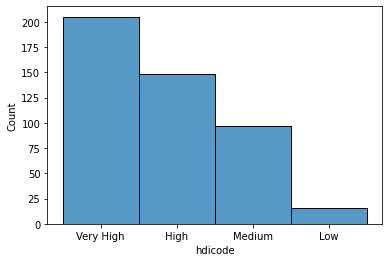

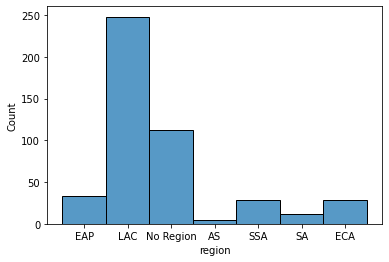

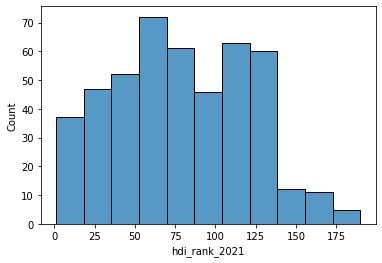

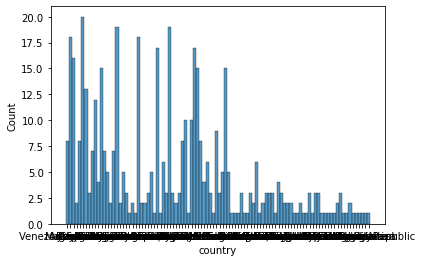

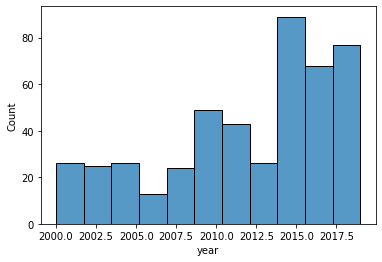

In [ ]:
# based on version that replaces null values with 0
# histograms of variable distribution
for column in paygap.select_dtypes(include='object'):
    if paygap[column].nunique() < 100:
        sns.histplot(data = paygap[column])
        plt.show()


The year with the most complete data is: 2014


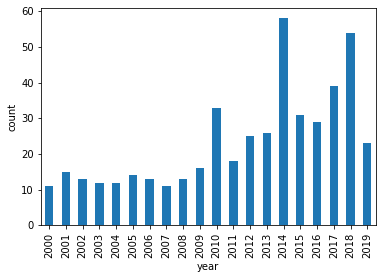

In [ ]:
# determine year with the most complete data
count = paygap.groupby(by='year')['gii'].count()
count.plot.bar()
plt.ylabel('count')
print('The year with the most complete data is:',count.idxmax())

In [ ]:
# check for duplicates
print('before dropping duplicates:', paygap.count())

# after dropping duplicates
paygap.drop_duplicates()
print('after dropping duplicates:', paygap.count())

before dropping duplicates: hdicode          466
region           466
hdi_rank_2021    466
country          466
hdi              466
coef_ineq        466
se_m             466
se_f             466
pr_f             466
mys              466
mmr              466
lfpr m           466
lfpr f           466
le               466
ineq_le          466
ineq_inc         466
ihdi             466
gnipc            466
gii              466
gdi              466
abr              466
year             466
wage_ratio       466
dtype: int64
after dropping duplicates: hdicode          466
region           466
hdi_rank_2021    466
country          466
hdi              466
coef_ineq        466
se_m             466
se_f             466
pr_f             466
mys              466
mmr              466
lfpr m           466
lfpr f           466
le               466
ineq_le          466
ineq_inc         466
ihdi             466
gnipc            466
gii              466
gdi              466
abr              466
year    

In [ ]:
# convert indices from object type to float64
paygap[['hdi_rank_2021','hdi','coef_ineq','se_m','se_f','pr_f','mys','mmr','lfpr m','lfpr f','le','ineq_le','ineq_inc','ihdi','gnipc','gii','gdi','abr','wage_ratio']] = paygap[['hdi_rank_2021','hdi','coef_ineq','se_m','se_f','pr_f','mys','mmr','lfpr m','lfpr f','le','ineq_le','ineq_inc','ihdi','gnipc','gii','gdi','abr','wage_ratio']].astype(np.float64)
# save original df with both numerical and categorical data
paygap_original = paygap
# one-hot encoding of categorical data to integer values except for country
paygap = pd.get_dummies(paygap, columns = ['hdicode','region'])
paygap.dtypes

hdi_rank_2021        float64
country               object
hdi                  float64
coef_ineq            float64
se_m                 float64
se_f                 float64
pr_f                 float64
mys                  float64
mmr                  float64
lfpr m               float64
lfpr f               float64
le                   float64
ineq_le              float64
ineq_inc             float64
ihdi                 float64
gnipc                float64
gii                  float64
gdi                  float64
abr                  float64
year                  object
wage_ratio           float64
hdicode_High           uint8
hdicode_Low            uint8
hdicode_Medium         uint8
hdicode_Very High      uint8
region_AS              uint8
region_EAP             uint8
region_ECA             uint8
region_LAC             uint8
region_No Region       uint8
region_SA              uint8
region_SSA             uint8
dtype: object

In [ ]:
paygap.sample(10)

,hdi_rank_2021,country,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,...,hdicode_Low,hdicode_Medium,hdicode_Very High,region_AS,region_EAP,region_ECA,region_LAC,region_No Region,region_SA,region_SSA
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,166.0,Uganda,0.520,25.275483,36.160000,28.020000,34.298441,5.619522,375.0,73.633,...,1,0,0,0,0,0,0,0,0,1
2016-01-01,90.0,Maldives,0.741,20.317622,36.808229,40.839356,5.882353,6.818000,54.0,68.712,...,0,0,0,0,0,0,0,0,1,0
2018-01-01,118.0,Bolivia (Plurinational State of),0.714,22.008886,66.502592,56.832369,51.807229,9.630357,155.0,80.055,...,0,1,0,0,0,0,1,0,0,0
2018-01-01,137.0,Honduras,0.617,23.127195,29.810511,32.328609,21.093750,6.287880,65.0,83.189,...,0,1,0,0,0,0,1,0,0,0
2016-01-01,118.0,Bolivia (Plurinational State of),0.701,24.221665,63.317875,53.559769,51.807229,9.162833,161.0,77.808,...,0,1,0,0,0,0,1,0,0,0
2014-01-01,49.0,Montenegro,0.819,8.472151,96.468981,87.275998,17.283951,11.610682,6.0,59.534,...,0,0,1,0,0,1,0,0,0,0
2010-01-01,125.0,El Salvador,0.659,23.073594,44.791870,39.096272,19.047619,6.339930,54.0,76.075,...,0,1,0,0,0,0,1,0,0,0
2018-01-01,190.0,Chad,0.398,37.399747,23.415501,7.278934,15.254237,2.479598,1140.0,71.518,...,1,0,0,0,0,0,0,0,0,1
2018-01-01,184.0,Burkina Faso,0.449,29.961907,15.741910,9.934090,11.023622,1.919520,320.0,73.434,...,1,0,0,0,0,0,0,0,0,1


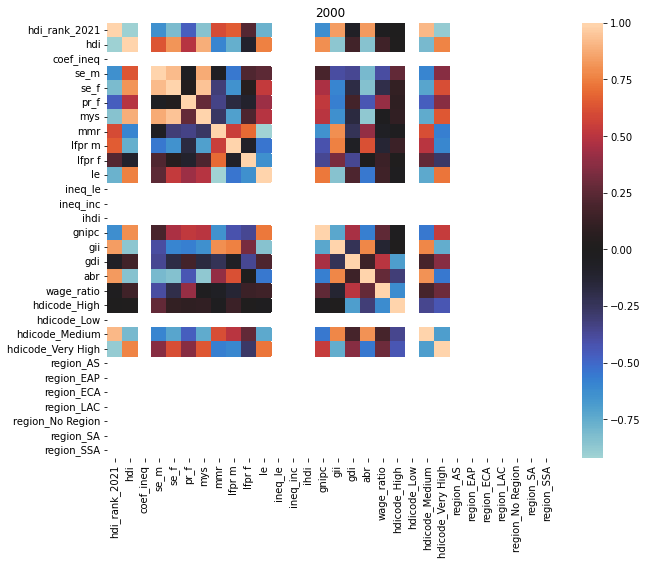

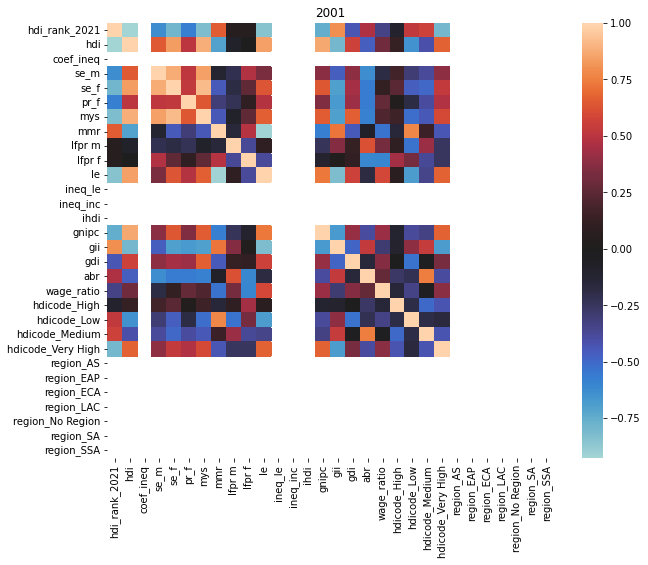

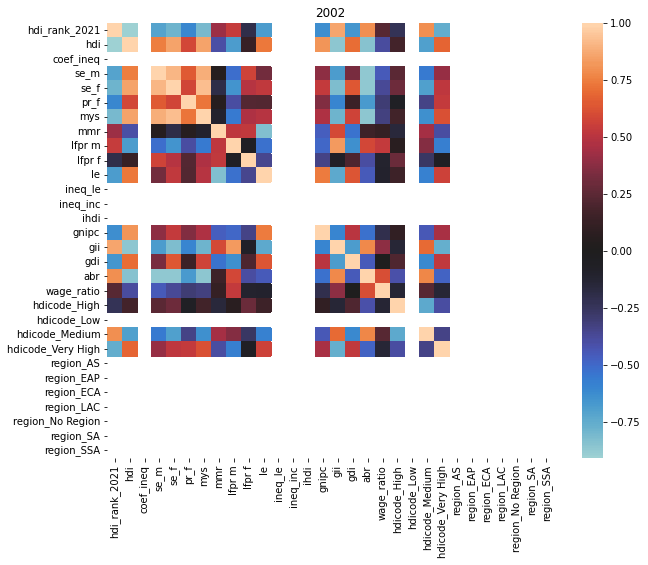

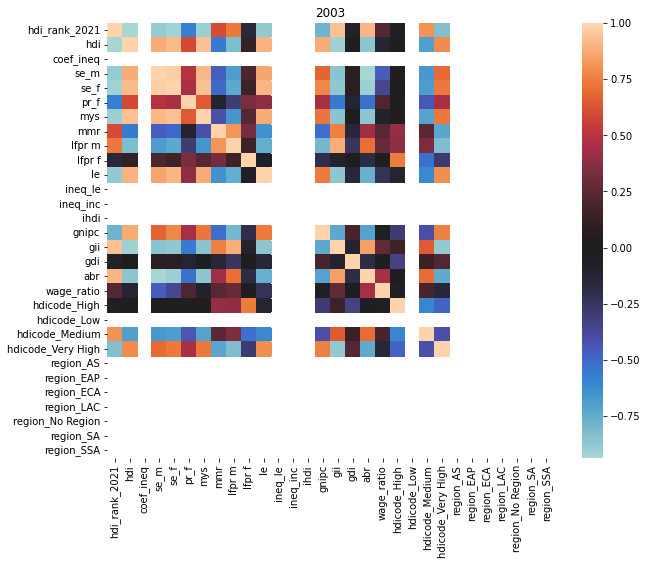

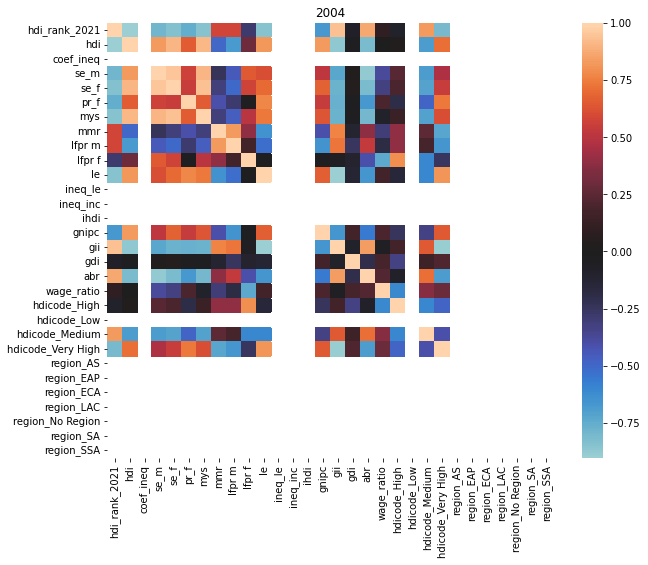

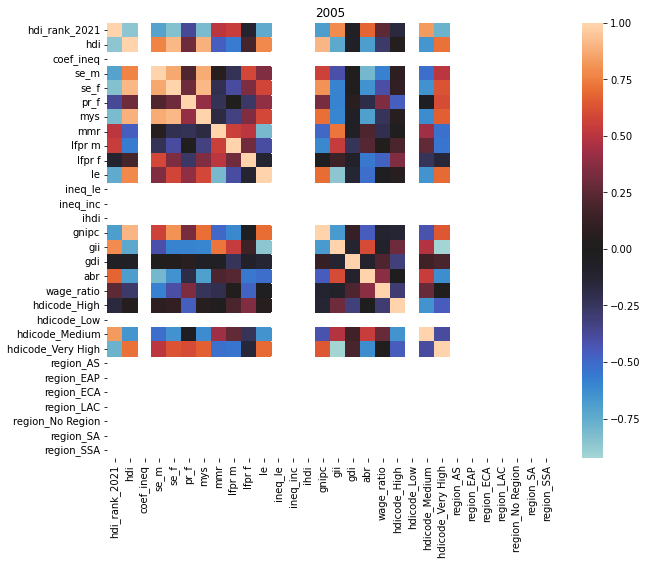

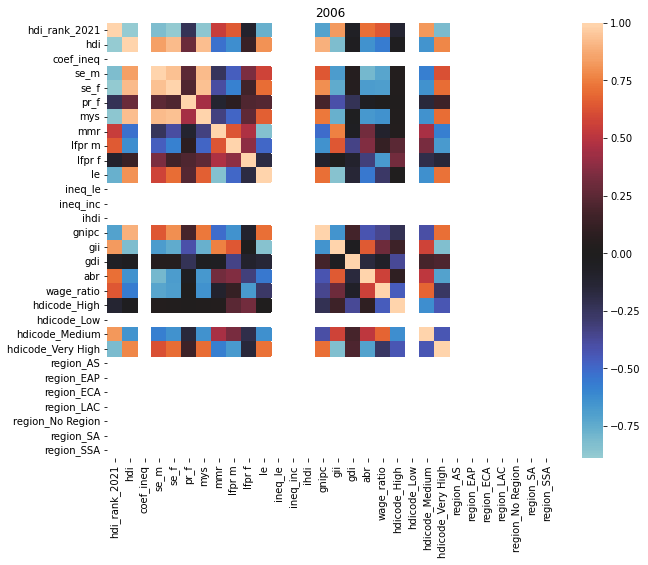

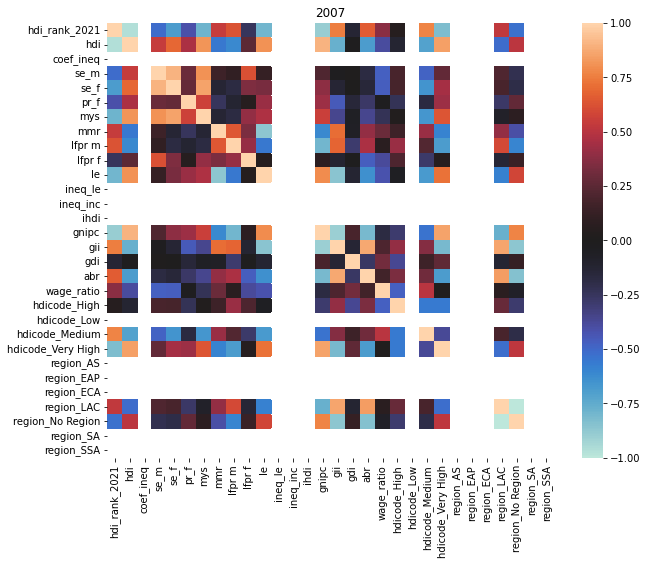

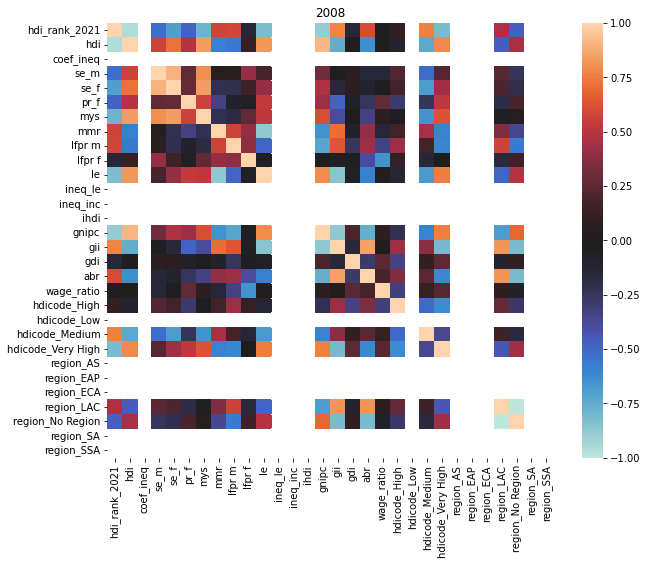

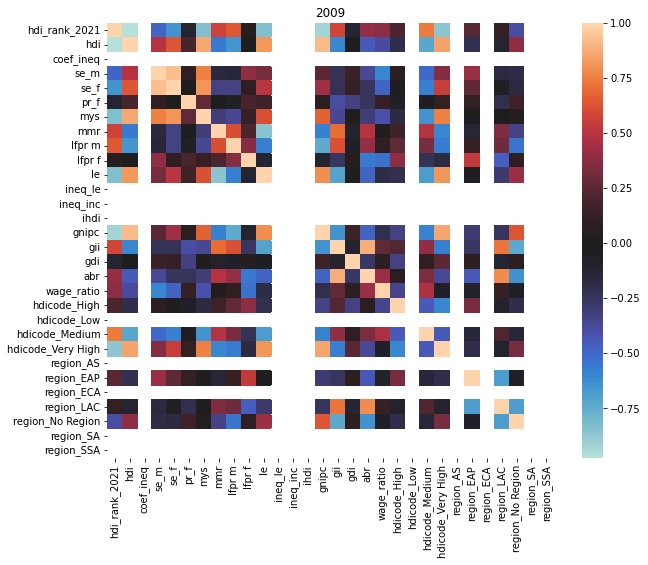

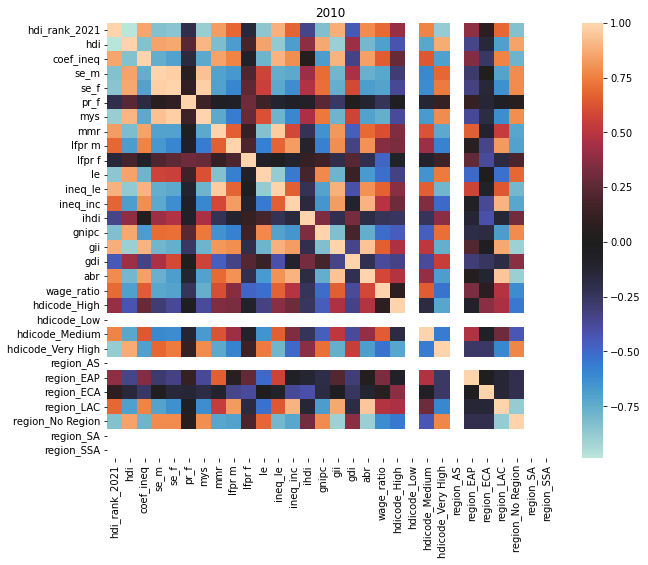

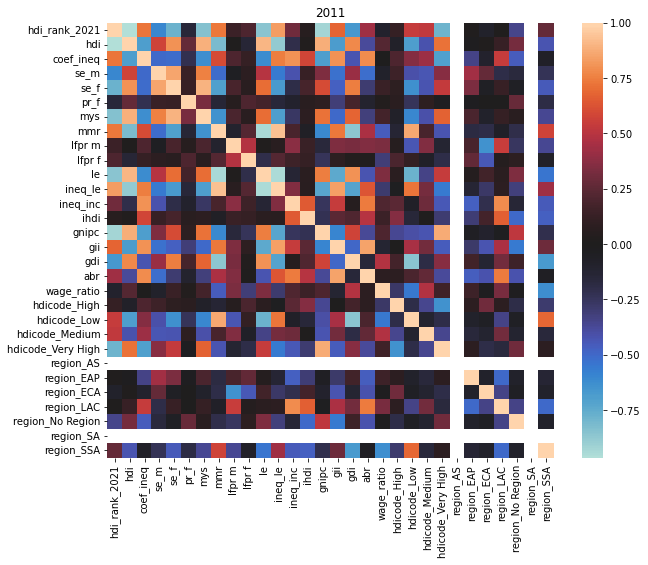

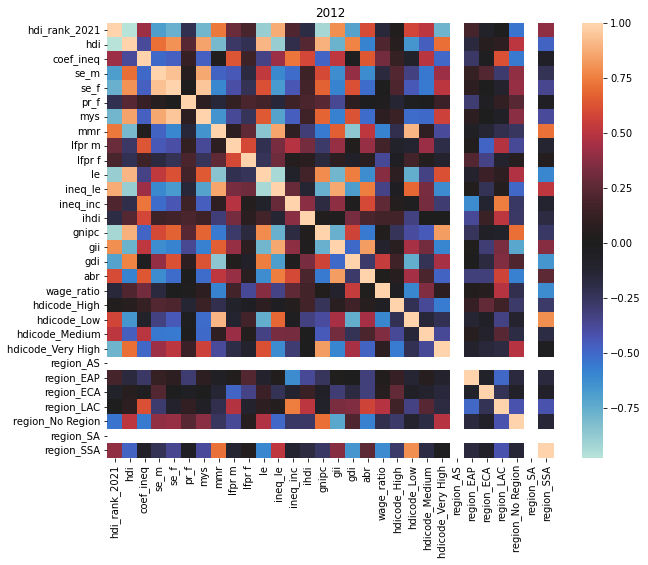

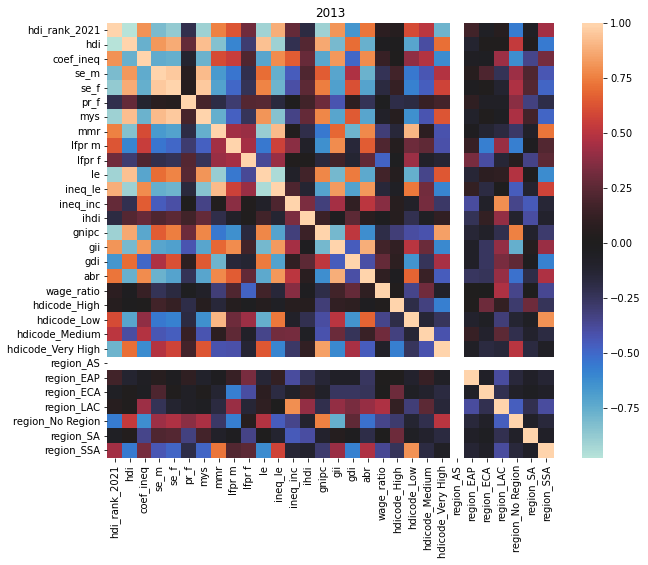

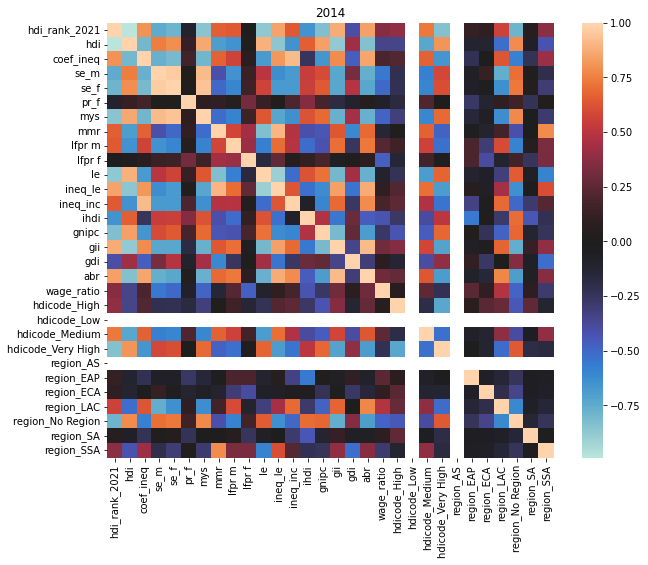

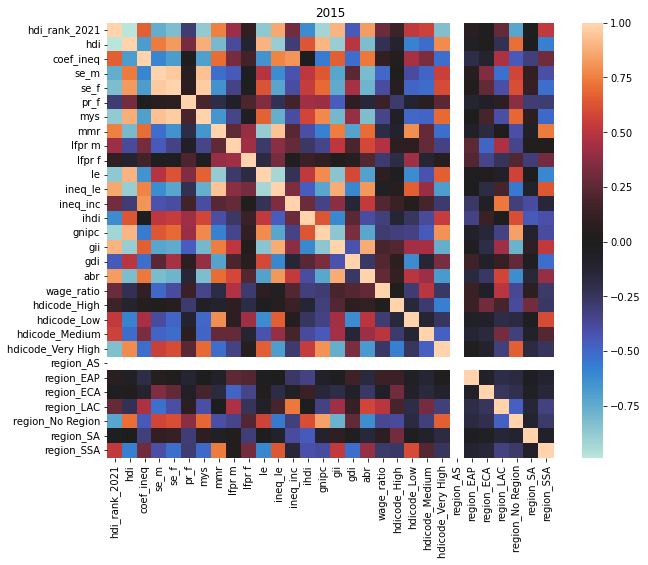

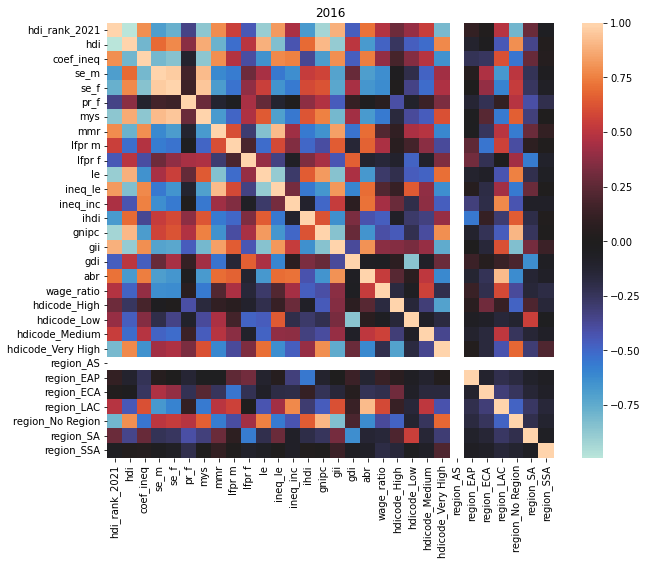

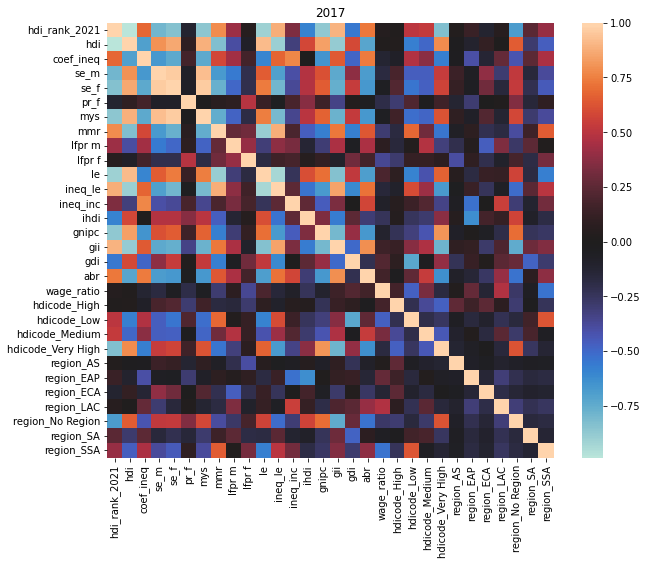

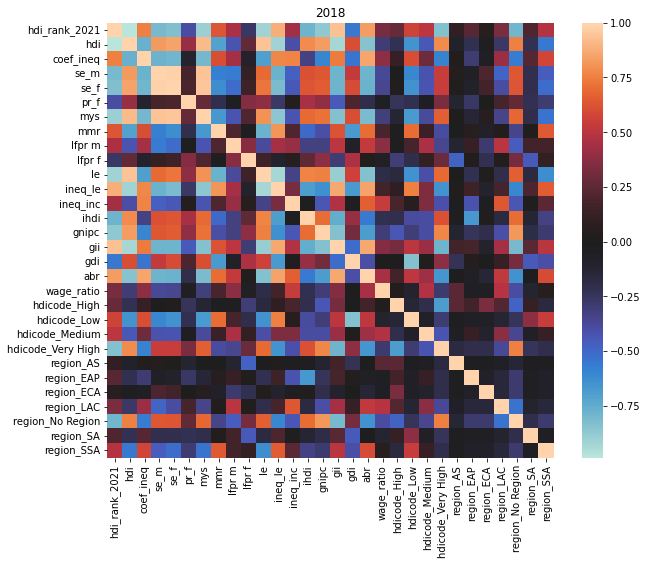

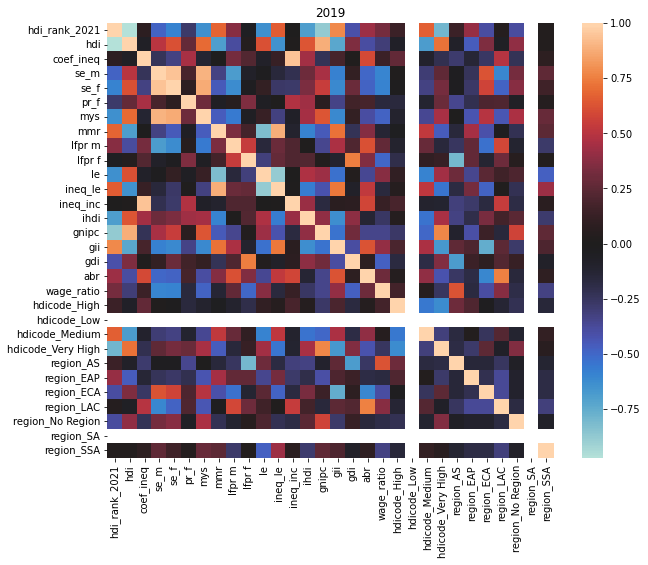

In [ ]:
for year in np.sort(paygap['year'].unique()):
  corr_matrix = paygap.loc[paygap['year']==year].corr()
  fig, ax = plt.subplots(figsize=(10,8)) 
  sns.heatmap(data = corr_matrix, center = 0)
  plt.title(str(year))

In [ ]:
# # feature extraction with Principal Component Analysis (PCA)
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# # split data into training and testing set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(paygap.select_dtypes('float'),test_size = 0.2, random_state = 0)

In [ ]:
# print(pca.components_)

In [ ]:
# print(pca.explained_variance_)

In [ ]:
# print(pca.explained_variance_ratio_)

# New Approach to prepare data for Principal Component Analysis (PCA)
## By implementing the Factorial Analysis of Mixed Data (FAMD)

FAMD generalizes PCA for datasets containing both numerical and categorical values.

For more information, please see [here](https://towardsdatascience.com/famd-how-to-generalize-pca-to-categorical-and-numerical-data-2ddbeb2b9210), and an example of the application of FAMD [here](https://medium.com/fifty-five-data-science/how-to-delete-bias-in-your-dataset-before-applying-a-clustering-ff1dfd14d179).

Steps of FAMD:

1. Standardize numerical columns by obtaining the z-score
2. Divide one-hot encoded categorical columns by the square root of its probability
3. Center the columns
4. Apply PCA on the new table

More resources:
[Plot for explained variance](https://vitalflux.com/pca-explained-variance-concept-python-example/), [2D projection of PCA](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60), [Centering data for categorical variables](https://www.statology.org/center-data-in-python/)

Have not implemented yet:
[Visualize all the original dimensions](https://plotly.com/python/pca-visualization/), [PCA for time-series](https://stats.stackexchange.com/questions/158281/can-pca-be-applied-for-time-series-data)

In [ ]:
from scipy import stats

In [ ]:
# numerical variables
X_n = pd.DataFrame(paygap_original.select_dtypes('float64'))
target = X_n['wage_ratio']
X_n = X_n.drop(columns=['hdi_rank_2021','wage_ratio'])
X_n.sample(10)
# standard scale the numerical variables
X_n_nor = stats.zscore(X_n)
X_n_nor.sample(10)

,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr
date,,,,,,,,,,,,,,,,,
2009-01-01,-0.311122,-1.069902,-0.549046,-0.297895,-1.144261,-0.819651,-0.052304,0.319630,0.351904,-0.297586,-0.930204,-1.178341,-1.274054,-0.342599,0.699242,0.307960,0.444219
2012-01-01,0.219013,0.618046,-0.054453,-0.281503,-0.283001,-0.023031,-0.111035,-0.080380,-0.868558,-0.024181,0.291532,0.172105,0.656678,0.003275,0.217410,0.024293,-0.632562
2014-01-01,0.036208,0.534736,0.310150,-0.143805,1.019745,0.161187,-0.649406,-0.755534,-0.679326,0.277554,-0.095305,1.055107,0.614836,-0.295790,-1.124402,0.011099,-0.989502
2017-01-01,0.621185,0.164727,-0.330953,-0.008811,0.028656,0.014737,-0.561309,-0.115415,0.528840,0.603035,-0.123443,0.556637,0.868880,0.193036,-0.453496,0.492674,-0.124912
2010-01-01,-1.206868,2.072983,-1.288104,-1.529575,0.650967,-1.768232,1.415980,-0.130173,1.120728,-1.769918,2.551857,0.145275,-0.012802,-0.604977,0.668746,-0.114243,-0.204534
2018-01-01,1.306705,-0.612757,1.677507,1.783591,-0.153190,1.631690,-0.698348,-0.659414,0.197659,0.868659,-0.500615,-0.530833,1.278339,1.249376,-1.307376,0.268379,-1.213353
2015-01-01,-0.137457,1.190102,-0.311839,0.025788,-0.262400,-0.435632,0.192410,0.287162,-0.270773,-0.296681,1.495049,1.034060,0.435511,-0.273607,0.778531,0.400317,1.232196
2007-01-01,-0.429946,-1.069902,-0.651909,-0.409634,-1.129128,-0.927825,-0.032727,0.333234,0.336609,-0.409886,-0.930204,-1.178341,-1.274054,-0.367043,0.741936,0.307960,0.595363
2011-01-01,-1.279990,2.255930,-1.564036,-1.630555,-0.781837,-1.693361,0.466490,1.325752,-1.038597,-0.638764,1.502699,2.101773,-0.057633,-0.763911,1.205471,-0.219794,1.099656


In [ ]:
# categorical variables
X_c = pd.DataFrame(paygap_original.select_dtypes('object'))
X_c.sample(10)
# one-hot encode columns
X_c_nor = pd.get_dummies(X_c)
X_c_nor.sample(10)

,hdicode_High,hdicode_Low,hdicode_Medium,hdicode_Very High,region_AS,region_EAP,region_ECA,region_LAC,region_No Region,region_SA,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-01-01,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2014-01-01,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2011-01-01,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2014-01-01,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2010-01-01,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2017-01-01,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2001-01-01,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# probability for each one-hot encoded column
# 129 columns in total
# derive probability for each column
import math
probability = [] #square root of probability
for (columnname, columnData) in X_c_nor.iteritems():
  # print(columnData.values)
  p = math.sqrt(sum(columnData.values)/len(columnData.values))
  probability.append(p) 
print(probability)
print(len(probability))
# transform X_c_nor
test = X_c_nor / probability
print(test)
# center the columns
#create function to center data
center_function = lambda x: x - x.mean()
#apply function to original NumPy array
data_centered = center_function(test)

[0.5635570658980377, 0.18529642184483178, 0.4562395274828434, 0.6632602529099183, 0.09264821092241589, 0.2661117258667435, 0.24512412551577056, 0.7295127423162098, 0.4902482510315411, 0.16047140854798211, 0.24946294245168432, 0.046324105461207944, 0.18529642184483178, 0.11347042117083507, 0.08023570427399106, 0.046324105461207944, 0.046324105461207944, 0.10358384880813022, 0.08023570427399106, 0.1909991798288123, 0.1464896838272619, 0.046324105461207944, 0.19653653462412551, 0.06551217820804184, 0.06551217820804184, 0.046324105461207944, 0.046324105461207944, 0.046324105461207944, 0.046324105461207944, 0.046324105461207944, 0.13102435641608368, 0.10358384880813022, 0.1794124889792144, 0.046324105461207944, 0.08023570427399106, 0.12256206275788528, 0.06551217820804184, 0.1794124889792144, 0.1909991798288123, 0.20192209435532607, 0.08023570427399106, 0.10358384880813022, 0.08023570427399106, 0.046324105461207944, 0.06551217820804184, 0.046324105461207944, 0.08023570427399106, 0.167023937

In [ ]:
# # scale the dataset
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = pd.concat([X_n,test],axis=1)
# sc.fit(X)
# X_nor = sc.transform(X)
# print(X_nor)
# X = X_nor

In [ ]:
X=pd.concat([X_n_nor,data_centered],axis=1)
X=pd.concat([X_n_nor,X_c_nor],axis=1)
X.sample(10)

,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1.069058,-1.069902,0.403270,0.263386,1.088176,0.229836,-0.688560,-0.836768,0.135581,1.449807,...,1,0,0,0,0,0,0,0,0,0
2017-01-01,0.621185,0.164727,-0.330953,-0.008811,0.028656,0.014737,-0.561309,-0.115415,0.528840,0.603035,...,0,0,0,0,0,0,0,1,0,0
2018-01-01,0.959375,-0.291319,1.675275,1.594116,-0.309746,1.318924,-0.649406,-2.109307,-0.527281,0.740219,...,0,0,0,0,0,0,0,0,1,0
2010-01-01,-1.334832,2.152975,-1.638903,-1.691802,-0.895622,-1.770744,0.535010,1.357194,-1.009708,-0.696272,...,1,0,0,0,0,0,0,0,0,0
2000-01-01,-0.274561,-1.069902,-0.690160,-0.378171,-1.090337,-0.370807,0.163045,0.712839,-0.685824,-0.094766,...,0,0,0,0,0,0,0,0,0,0
2016-01-01,-0.731574,0.997652,-0.631090,-0.764714,0.912734,-0.840446,-0.267652,0.130983,-0.535878,-0.475464,...,0,0,0,0,0,0,1,0,0,0
2007-01-01,-0.969221,-1.069902,-0.569660,-0.826352,-0.659719,-0.704993,1.680271,1.077302,1.071845,-1.823247,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,-0.758995,1.575285,-0.264466,-0.546405,0.730943,-0.344636,1.249575,1.056769,1.108732,-1.533010,...,0,1,0,0,0,0,0,0,0,0
2011-01-01,0.200733,-1.069902,0.463364,0.351145,-0.813665,0.410418,-0.434057,0.394961,-0.579762,0.048599,...,0,1,0,0,0,0,0,0,0,0


[4.30639343e-01 1.58872424e-01 6.90502470e-02 5.65543861e-02
 4.59659692e-02 3.72855933e-02 2.63705668e-02 2.13343010e-02
 1.47073428e-02 1.25705861e-02 1.01143912e-02 7.47471209e-03
 6.50643699e-03 5.98848768e-03 4.73448831e-03 4.23413524e-03
 4.04941457e-03 3.82600418e-03 3.52814087e-03 3.44799831e-03
 3.11071640e-03 3.08619163e-03 2.78606446e-03 2.73707218e-03
 2.65735093e-03 2.53945862e-03 2.30294337e-03 2.07680205e-03
 1.95990558e-03 1.88066785e-03 1.82225822e-03 1.71030103e-03
 1.68671100e-03 1.63421411e-03 1.54965328e-03 1.53435763e-03
 1.50253027e-03 1.43011804e-03 1.40852388e-03 1.31312706e-03
 1.29766734e-03 1.29566320e-03 1.26548405e-03 1.21945674e-03
 1.19734075e-03 1.11891642e-03 1.08625527e-03 1.00426184e-03
 9.64079035e-04 9.19647645e-04 8.37577079e-04 8.11459825e-04
 7.50313329e-04 7.08030180e-04 6.75394305e-04 6.44859985e-04
 6.18451474e-04 5.89057611e-04 5.52596610e-04 5.46433666e-04
 5.30377168e-04 4.94195244e-04 4.87683918e-04 4.55072492e-04
 4.51123989e-04 4.108385

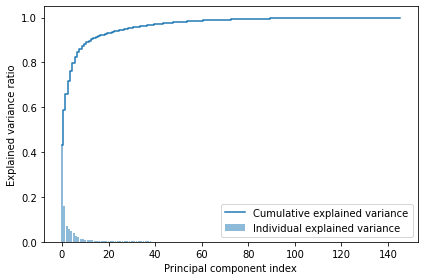

In [ ]:
# Apply PCA algorithm
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(explained_variance)
# Create the visualization plot
plt.bar(range(0,len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
print(principalDf)

[0.43063934 0.15887242]
     principal component 1  principal component 2
0                -1.506088              -1.781914
1                 0.666604               1.723554
2                -1.133164               1.184453
3                -1.354190              -1.837506
4                 1.773782              -2.115822
..                     ...                    ...
461              -1.785017               1.156087
462               3.181759              -0.496142
463               0.636409              -2.208110
464               1.069235               2.789409
465              -0.391397              -1.610576

[466 rows x 2 columns]


In [ ]:
target = target.reset_index(drop = True)
finalDf = pd.concat([principalDf, target], axis = 1)

<Figure size 144x432 with 0 Axes>

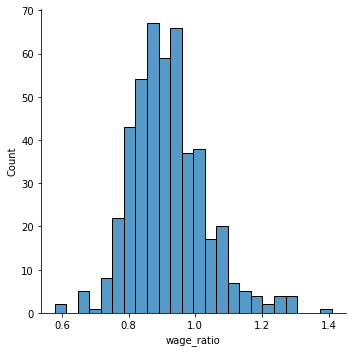

In [ ]:
# check target range
fig = plt.figure(figsize = (2,6))
sns.displot(target)

Try binning wage_ratio to get 3 categories.

In [ ]:
max_wr = max(target)
min_wr = min(target)
low_wr = np.percentile(target, 33)
med_wr = np.percentile(target, 66)
print('max:', max(target))
print('min:', min(target))
print('low:', np.percentile(target, 33))
print('med:', np.percentile(target, 66))
# group wage_ratio into 3 categories
target_gr_low = target[(target>=min_wr) & (target<low_wr)].index.tolist()
print(target_gr_low)
target_gr_med = target[(target>=low_wr) & (target<med_wr)].index.tolist()
print(target_gr_med)
target_gr_high = target[(target>=med_wr) & (target<=max_wr)].index.tolist()
print(target_gr_high)

max: 1.4096690360222364
min: 0.5784313725490196
low: 0.8657940099116569
med: 0.9490013619580706
[12, 16, 19, 24, 26, 27, 29, 30, 35, 36, 39, 42, 43, 44, 45, 46, 50, 56, 57, 63, 64, 74, 77, 79, 82, 83, 89, 90, 93, 94, 95, 98, 101, 102, 103, 109, 110, 113, 119, 120, 121, 122, 125, 128, 130, 133, 135, 138, 146, 147, 148, 155, 159, 160, 163, 165, 171, 172, 173, 175, 179, 181, 182, 183, 185, 186, 187, 189, 194, 195, 196, 200, 203, 204, 205, 206, 214, 219, 227, 229, 232, 233, 234, 243, 244, 245, 250, 251, 252, 253, 256, 258, 260, 263, 267, 268, 272, 278, 279, 280, 292, 298, 299, 301, 303, 305, 306, 307, 320, 330, 334, 336, 340, 345, 348, 351, 352, 354, 357, 363, 366, 368, 369, 370, 375, 376, 377, 378, 381, 382, 383, 385, 389, 392, 395, 399, 401, 405, 408, 413, 417, 420, 423, 426, 429, 432, 437, 438, 442, 446, 447, 448, 449, 454]
[1, 4, 5, 11, 18, 23, 25, 31, 33, 38, 47, 51, 52, 53, 55, 58, 59, 60, 62, 66, 67, 70, 71, 72, 78, 88, 96, 97, 99, 104, 108, 115, 117, 123, 124, 126, 127, 131, 134, 1

In [ ]:
target_cat = pd.DataFrame(np.zeros((len(target),1)))
for i in target_gr_low:
  target_cat.loc[i] = 'low'
for i in target_gr_med:
  target_cat.loc[i] = 'med'
for i in target_gr_high:
  target_cat.loc[i] = 'high'
print(target_cat)

        0
0    high
1     med
2    high
3    high
4     med
..    ...
461  high
462   med
463  high
464   med
465  high

[466 rows x 1 columns]


In [ ]:
target_cat = target_cat.reset_index(drop = True)
target_cat.columns = ['target']
finalDf = pd.concat([principalDf, target_cat], axis = 1)
print(finalDf)

     principal component 1  principal component 2 target
0                -1.506088              -1.781914   high
1                 0.666604               1.723554    med
2                -1.133164               1.184453   high
3                -1.354190              -1.837506   high
4                 1.773782              -2.115822    med
..                     ...                    ...    ...
461              -1.785017               1.156087   high
462               3.181759              -0.496142    med
463               0.636409              -2.208110   high
464               1.069235               2.789409    med
465              -0.391397              -1.610576   high

[466 rows x 3 columns]


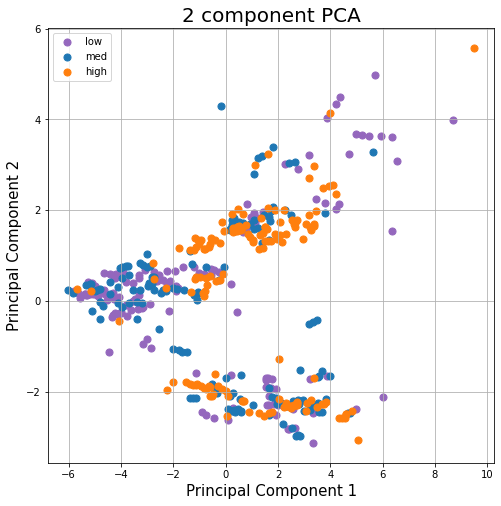

In [ ]:
# Visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['low', 'med', 'high']
colors = ['tab:purple', 'tab:blue', 'tab:orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()